In [1]:
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

#сохранение результатов обучения
filename='modellearn_data'
modelhs=pickle.load(open(filename, 'rb'))

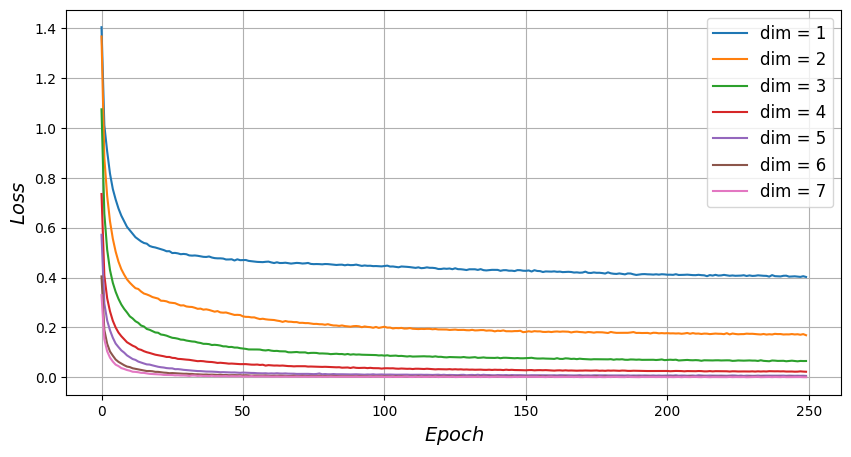

In [2]:
#построитель графиков обучения моделей
x = np.arange(0,250, 1)
plt.figure(figsize=(10, 5))
dim=1
for i in range(7):
    plt.plot(x, modelhs[-4+dim*5], label='dim = '+str(dim))
    dim=dim+1
plt.xlabel(r'$Epoch$', fontsize=14)
plt.ylabel(r'$Loss$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.savefig('figure_with_legend.png')
plt.show()

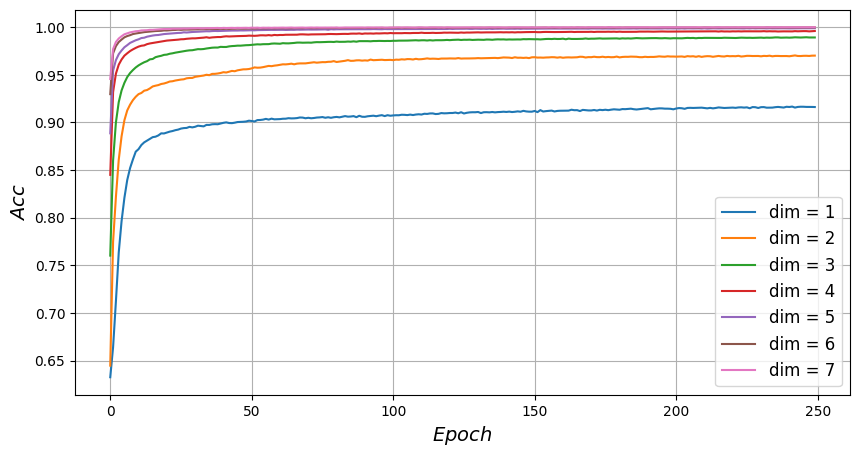

In [3]:
#построитель графиков обучения моделей
x = np.arange(0,250, 1)
plt.figure(figsize=(10, 5))
dim=1
for i in range(7):
    plt.plot(x, modelhs[-2+dim*5], label='dim = '+str(dim))
    dim=dim+1
plt.xlabel(r'$Epoch$', fontsize=14)
plt.ylabel(r'$Acc$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.savefig('figure_with_legend.png')
plt.show()

(199, 333) (439, 93)


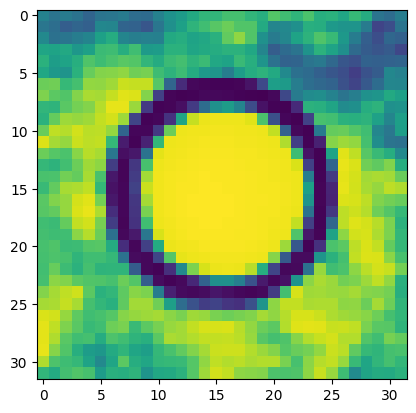

In [4]:
#Анализ работы моделей на основе одиночной сферы и скользящего окна

import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from tensorflow.keras.models import load_model
# Загрузка изображения одиночного воздушной сферы
nameim = 'Image_odin.tif'

# Обрезка и обработка
imageq=cv2.imread(nameim)
gray = cv2.cvtColor(imageq,cv2.COLOR_RGB2GRAY)
gray = cv2.equalizeHist(gray)
 
x=319.2
r=157.8*1.52
y=266.9





gray=cv2.rectangle(gray,(int(x-r/2),int(480-y+r/2)),(int(x+r/2),int(480-y-r/2)),(255, 0, 0),1)
#plt.imshow(gray)
#plt.show()
print((int(x-r/2),int(480-y+r/2)),(int(x+r/2),int(480-y-r/2)))
 
inter=cv2.INTER_AREA
ps=32
imageq=np.zeros((100,1024),dtype='uint8')
gray[0,0]
ggg=cv2.resize(gray[93:333,199:439],dsize=(ps,ps),interpolation=inter)
#for i in range(0,100):
 #   imageq[i,:]=np.reshape(cv2.resize(gray[224:307,118:413],dsize=(ps,ps),interpolation=inter),ps**2)
#ggg=cv2.resize(gray[224:307,413:118],dsize=(ps,ps),interpolation=inter)
plt.imshow(ggg)
plt.show()

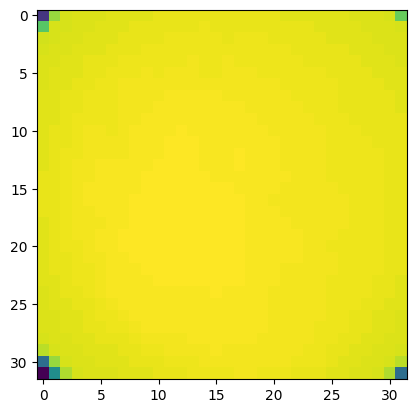

In [5]:
# создание тестового датасета с набором картинок со сферой расположенной по центру, с переменной величиной приближения
n=80
ggg=np.zeros((161,1024),dtype='uint8')
for i in range(161):
    
    ggg[i,:]=np.reshape(cv2.resize(gray[93-n:333+n,199-n:439+n],dsize=(ps,ps),interpolation=inter),1024)
    n=n-1
plt.imshow(np.reshape(ggg[160,:],(32,32)))
plt.show()

In [6]:
# Рескейлинг данных и расчет вероятности присутствия на них сферы по всем 7 обученным моделям
ggg=ggg/255.0
ggg=np.reshape(ggg,(len(ggg),32,32,1)).astype('float32')


dim=1
modelpr=[]
for i in range(7):
    model=load_model('modelwide'+str(dim))
    modelpr.append(model.predict(ggg))
    dim=dim*2
    del(model)

6/6 [==============================] - 1s 48ms/step


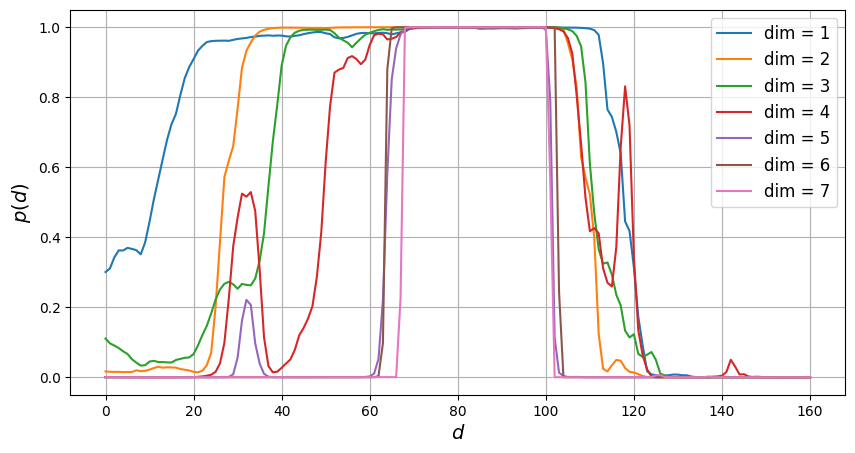

In [7]:
#построитель графиков предсказания моделей в зависимости от величины зума
x = np.arange(0,161, 1)
plt.figure(figsize=(10, 5))
dim=0
for i in range(7):
    plt.plot(x, modelpr[dim], label='dim = '+str(dim+1))
    dim=dim+1
plt.xlabel(r'$d$', fontsize=14)
plt.ylabel(r'$p(d)$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.savefig('figure_with_legend.png')
plt.show()


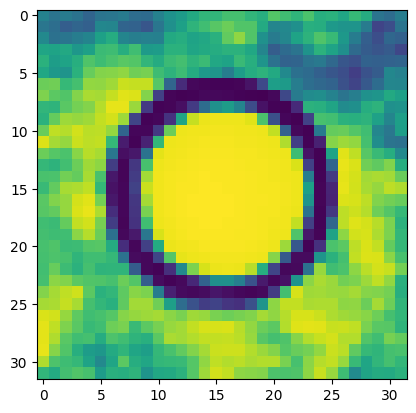

In [8]:
# Создание массива данных изображений скользящего окна смещающегося вбок
n=0
ggg=np.zeros((199,1024),dtype='uint8')
for i in range(199):
    
    ggg[i,:]=np.reshape(cv2.resize(gray[93:333,199-n:439-n],dsize=(ps,ps),interpolation=inter),1024)
    n=n+1
plt.imshow(np.reshape(ggg[0,:],(32,32)))
plt.show()

In [9]:
ggg=ggg/255.0
ggg=np.reshape(ggg,(len(ggg),32,32,1)).astype('float32')


dim=1
modelpr=[]
for i in range(7):
    model=load_model('modelwide'+str(dim))
    modelpr.append(model.predict(ggg))
    dim=dim*2
    del(model)

7/7 [==============================] - 1s 88ms/step


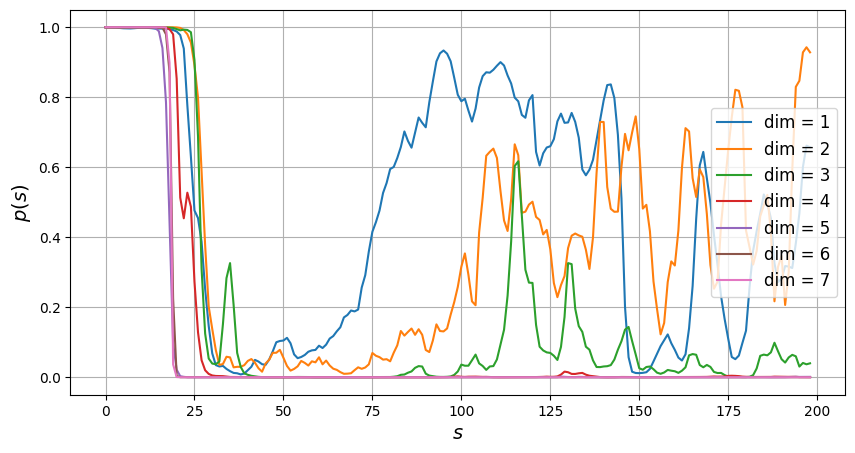

In [10]:
#построитель графиков предсказания моделей в зависимости от смещения скользящего окна от центра сферы
x = np.arange(0,199, 1)
plt.figure(figsize=(10, 5))
dim=0
for i in range(7):
    plt.plot(x, modelpr[dim], label='dim = '+str(dim+1))
    dim=dim+1
plt.xlabel(r'$s$', fontsize=14)
plt.ylabel(r'$p(s)$', fontsize=14)
plt.grid(True)
plt.legend(loc='right', fontsize=12)
plt.savefig('figure_with_legend.png')
plt.show()
